## 시퀀스 배열로 다루는 순환 신경망(RNN)

### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters # 로이터 뉴스 데이터셋
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 분리
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=100,test_split=0.2)

In [2]:
# 데이터 확인
category = len(np.unique(y_train)) # y_train의 고유한 값들의 개수
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
print(len(y_train))

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]
8982


In [3]:
# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

# 모델의 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/200
450/450 [==============================] - 49s 101ms/step - loss: 2.2538 - accuracy: 0.4246 - val_loss: 2.0555 - val_accuracy: 0.4884
Epoch 2/200
450/450 [==============================] - 47s 105ms/step - loss: 1.9048 - accuracy: 0.5016 - val_loss: 1.8325 - val_accuracy: 0.5280
Epoch 3/200
450/450 [==============================] - 44s 98ms/step - loss: 1.7573 - accuracy: 0.5445 - val_loss: 1.7364 - val_accuracy: 0.5494
Epoch 4/200
450/450 [==============================] - 45s 100ms/step - loss: 1.6872 - accuracy: 0.5654 - val_loss: 1.6889 - val_accuracy: 0.5770
Epoch 5/200
450/450 [==============================] - 44s 98ms/step - loss: 1.6306 - accuracy: 0.5875 - val_loss: 1.6802 - val_accuracy: 0.5788
Epoch 6/200
450/450 [==============================] - 45s 99ms/step - loss: 1.5586 - accuracy: 0.6055 - val_loss: 1.6012 - val_accuracy: 0.5948
Epoch 7/200
450/450 [==============================] - 45s 100ms/step - loss: 1.5098 - accuracy: 0.6128 - val_loss: 1.5577 - va

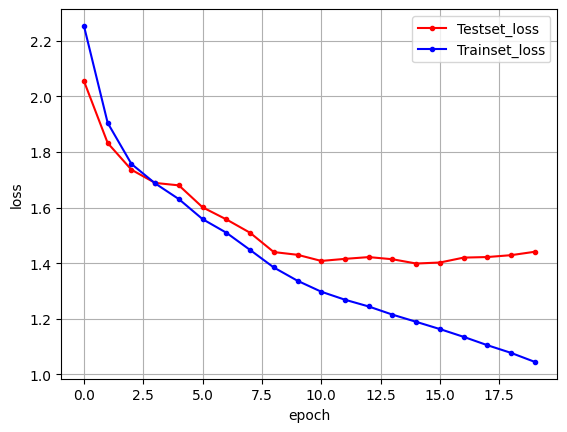

In [4]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss' )
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss' )

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.253767,0.424627,2.055490,0.488424
1,1.904790,0.501559,1.832500,0.528050
2,1.757305,0.544533,1.736446,0.549421
3,1.687181,0.565353,1.688886,0.577026
4,1.630635,0.587508,1.680163,0.578807
5,1.558597,0.605544,1.601163,0.594835
6,1.509785,0.612781,1.557705,0.601069
7,1.447835,0.629927,1.509611,0.611754
8,1.384742,0.648408,1.440158,0.646483
9,1.336842,0.663104,1.430322,0.643366
